<a href="https://colab.research.google.com/github/PSIPS/Expressing-Biology-in-Equations/blob/main/FRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

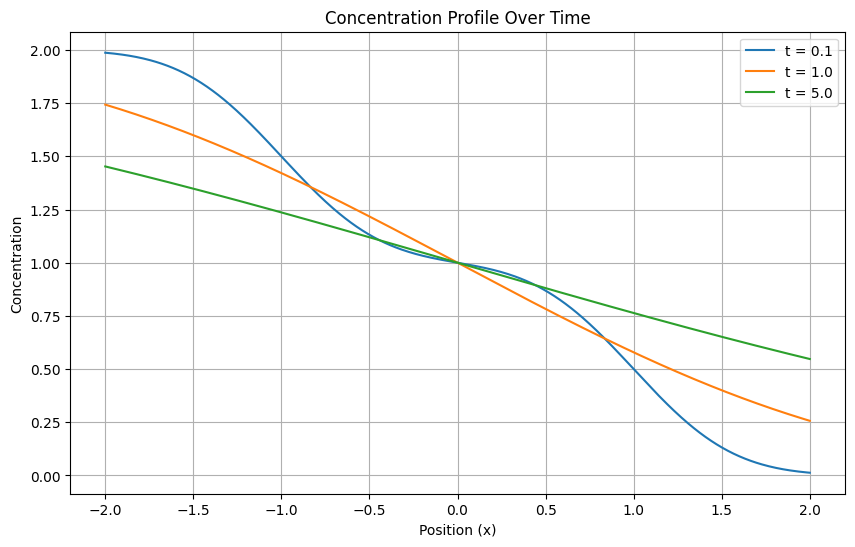

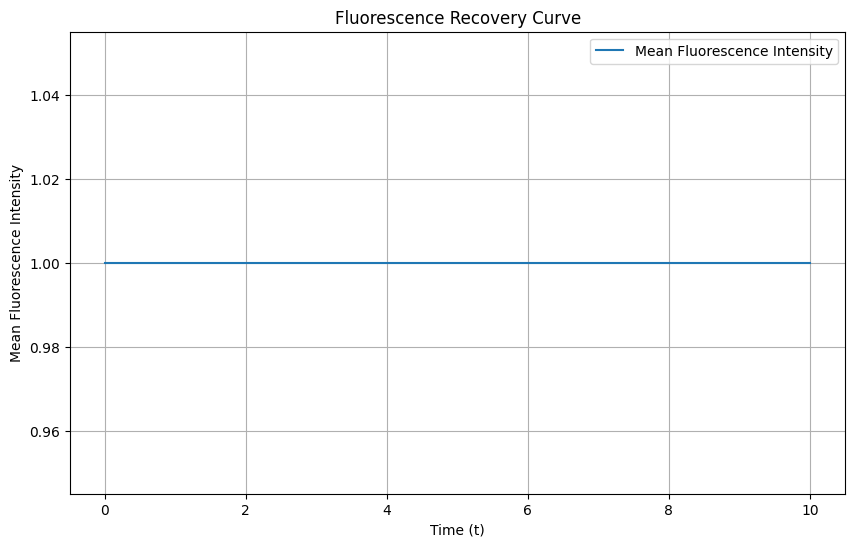

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.integrate import quad

# Parameters
D = 1.0  # Diffusion coefficient
l = 1.0  # Half-length of bleached region
C0 = 1.0  # Initial concentration
time = np.linspace(0.01, 10, 500)  # Time range
x = np.linspace(-2*l, 2*l, 500)  # Space range

# Analytical solution for concentration (Eq. 3.6)
def concentration(x, t, D, l, C0):
    return (C0 / 2) * (erfc((x - l) / np.sqrt(4 * D * t)) + erfc((x + l) / np.sqrt(4 * D * t)))

# Mean fluorescence intensity (Eq. 3.7)
def mean_intensity(t, D, l, C0):
    a = D / l**2
    integral, _ = quad(lambda x: concentration(x, t, D, l, C0), -l, l)
    return (1 / (2 * l)) * integral

# Compute results
concentration_profile = np.array([concentration(x, t, D, l, C0) for t in time])
mean_fluorescence = np.array([mean_intensity(t, D, l, C0) for t in time])

# Plot concentration profile
plt.figure(figsize=(10, 6))
for i, t in enumerate([0.1, 1.0, 5.0]):  # Example times
    plt.plot(x, concentration(x, t, D, l, C0), label=f't = {t}')
plt.title('Concentration Profile Over Time')
plt.xlabel('Position (x)')
plt.ylabel('Concentration')
plt.legend()
plt.grid()

# Plot recovery curve
plt.figure(figsize=(10, 6))
plt.plot(time, mean_fluorescence, label='Mean Fluorescence Intensity')
plt.title('Fluorescence Recovery Curve')
plt.xlabel('Time (t)')
plt.ylabel('Mean Fluorescence Intensity')
plt.legend()
plt.grid()

plt.show()
